# Download data

In [1]:
import os
CURR_PATH = os.getcwd()
DATA_PATH = os.path.join(CURR_PATH, "datasets")
TRAIN_DATA_URL = "https://www.kaggle.com/c/titanic/download/train.csv"
TEST_DATA_URL = "https://www.kaggle.com/c/titanic/download/test.csv"
TRAIN_DATA_FILE = "train.csv"
TEST_DATA_FILE = "test.csv"

In [2]:
def fetch_data(data_url, data_path, file_name):
    from six.moves import urllib
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    data_file_path = os.path.join(data_path, file_name)
    urllib.request.urlretrieve(data_url, data_file_path)

In [3]:
# Not working since the website requires authetification to download
# fetch_data(TRAIN_DATA_URL, DATA_PATH, TRAIN_DATA_FILE)
# fetch_data(TEST_DATA_URL, DATA_PATH, TEST_DATA_FILE)

# A quick look at data

In [4]:
import pandas as pd
train_data = pd.read_csv(os.path.join(DATA_PATH, TRAIN_DATA_FILE))
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008DBD048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009E5F2B0>]], dtype=object)

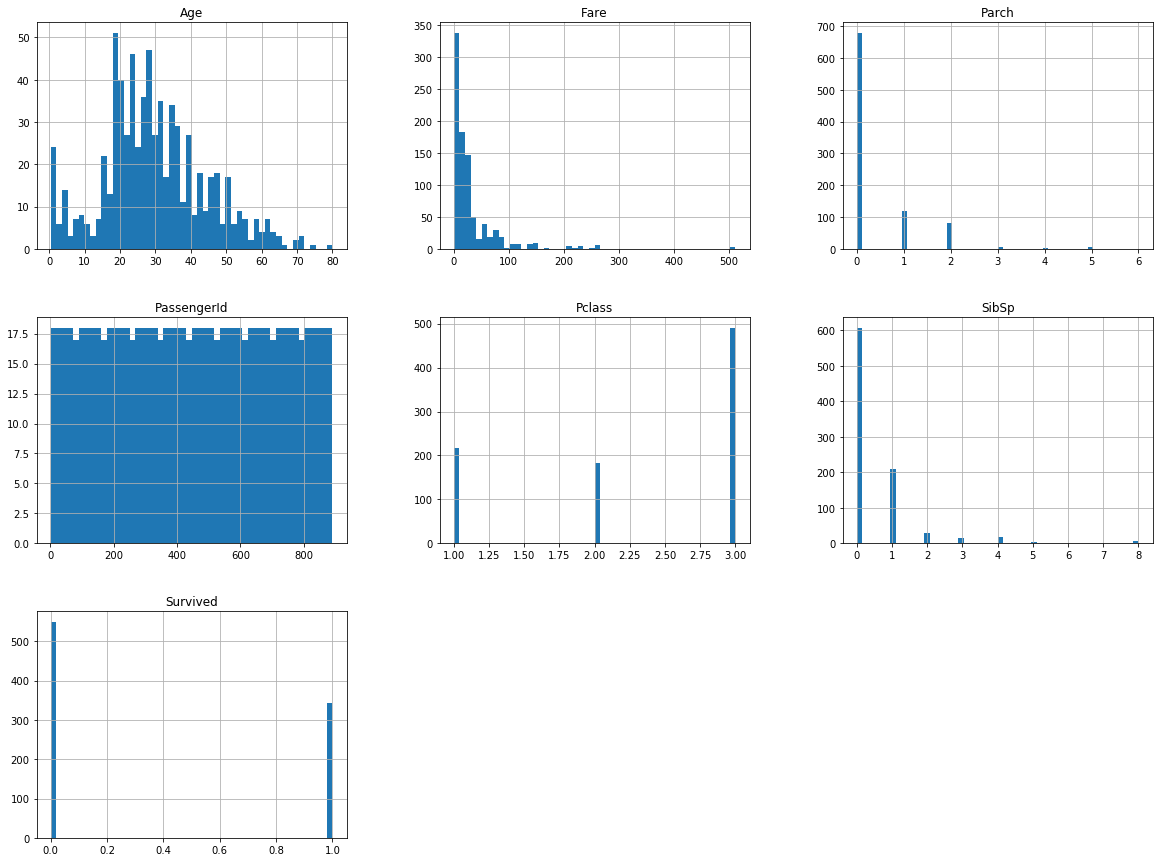

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
train_data.hist(bins=50, figsize=(20, 15))

# Stratified sampling

In [9]:
import numpy as np
train_data["age_cat"] = np.ceil(train_data["Age"]/10)
train_data["age_cat"].where(train_data["age_cat"] < 10, 10.0, inplace=True)

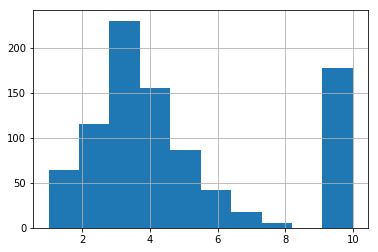

In [10]:
train_data["age_cat"].hist()

In [11]:
# The ~180 "10"s are from null values
# Make a training set out of train_data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train_data, train_data["age_cat"]):
    strat_train_set = train_data.loc[train_index]
    strat_test_set = train_data.loc[test_index]

In [12]:
train_data["age_cat"].value_counts() / len(train_data)

3.0     0.258137
10.0    0.198653
4.0     0.173962
2.0     0.129068
5.0     0.096521
1.0     0.071829
6.0     0.047138
7.0     0.019080
8.0     0.005612
Name: age_cat, dtype: float64

In [13]:
strat_train_set["age_cat"].value_counts() / len(strat_train_set)

3.0     0.258427
10.0    0.198034
4.0     0.174157
2.0     0.129213
5.0     0.096910
1.0     0.071629
6.0     0.046348
7.0     0.019663
8.0     0.005618
Name: age_cat, dtype: float64

In [14]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("age_cat", axis=1, inplace=True)

# Look for correlations

In [15]:
titan_train = strat_train_set.copy()
corr_matrix = titan_train.corr()

In [16]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.277492
Parch          0.058640
PassengerId   -0.018213
SibSp         -0.055609
Age           -0.091394
Pclass        -0.341786
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D097198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7F6B00>]], dtype=object)

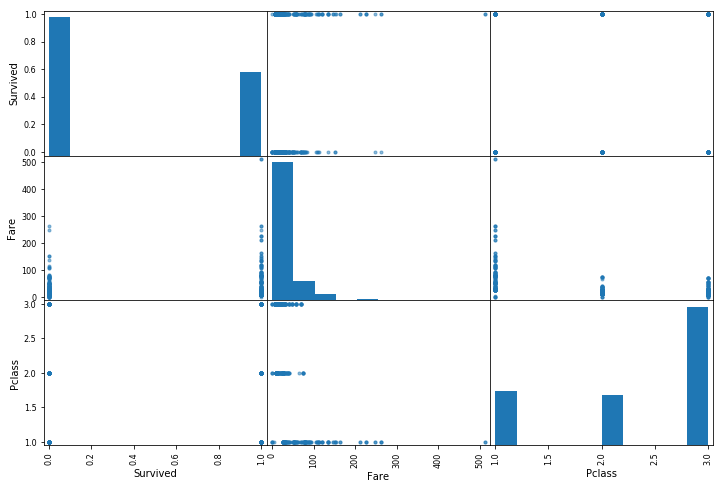

In [17]:
from pandas.tools.plotting import scatter_matrix
attributes = ["Survived", "Fare", "Pclass"]
scatter_matrix(titan_train[attributes], figsize=(12, 8))

In [18]:
# Correlation is not a good way to explore labeled data

# Skipping attribute combination / feature engineering for now

# Prepare the data for ML

In [19]:
titanic = strat_train_set.drop("Survived", axis=1)
titanic_label = strat_train_set["Survived"].copy()

In [20]:
from sklearn.preprocessing import Imputer, StandardScaler
imputer = Imputer(strategy="median")

In [21]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
347,348,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
738,739,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S
658,659,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
866,867,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C


In [22]:
titanic_num = titanic[["Age", "SibSp", "Parch", "Fare"]]

In [23]:
imputer.fit(titanic_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [24]:
X = imputer.transform(titanic_num)

In [25]:
titanic_num_tr = pd.DataFrame(X, columns=titanic_num.columns)
titanic_num_tr.describe()

,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000
mean,29.342697,0.526685,0.393258,30.924355
std,13.044830,1.155609,0.821552,46.261088
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,30.695800
max,74.000000,8.000000,6.000000,512.329200


In [26]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [27]:
cat_encoder = CategoricalEncoder()
titanic_cat = titanic[["Pclass", "Sex"]]
# titanic_cat_reshaped = housing_cat.values.reshape(-1, 1)
titanic_cat_1hot = cat_encoder.fit_transform(titanic_cat)
titanic_cat_1hot

<712x5 sparse matrix of type '<type 'numpy.float64'>'
	with 1424 stored elements in Compressed Sparse Row format>

In [28]:
titanic_cat_1hot.toarray()

array([[ 0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  1.],
       ..., 
       [ 1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.]])

# Transformation pipelines

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
num_attribs = list(titanic_num)
cat_attribs = list(titanic_cat)

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder()),
])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

titanic_prepared = full_pipeline.fit_transform(titanic)

In [30]:
titanic_prepared.shape

(712, 9)

# Model trials
Supported Vector Machine Classifier

In [31]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(titanic_prepared, titanic_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, titanic_prepared, titanic_label, cv=3, scoring="accuracy")

array([ 0.84033613,  0.83122363,  0.83966245])

Nearest Neighbors Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(titanic_prepared, titanic_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
cross_val_score(knn_clf, titanic_prepared, titanic_label, cv=3, scoring="accuracy")

array([ 0.82352941,  0.79746835,  0.81012658])

Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(titanic_prepared.toarray(), titanic_label)

GaussianNB(priors=None)

In [39]:
cross_val_score(gnb_clf, titanic_prepared.toarray(), titanic_label, cv=3, scoring="accuracy")

array([ 0.82773109,  0.78481013,  0.80168776])

In [40]:
from sklearn.ensemble import RandomForestClassifier
rdf_clf = RandomForestClassifier()
rdf_clf.fit(titanic_prepared, titanic_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
cross_val_score(rdf_clf, titanic_prepared, titanic_label, cv=3, scoring="accuracy")

array([ 0.82773109,  0.78902954,  0.80168776])

# Fine tune models

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['linear', 'rbf'], 'degree': range(2, 6), 'C': np.logspace(-2, 2, 5)}
]

svm_clf = SVC()

grid_search = GridSearchCV(svm_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(titanic_prepared, titanic_label)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02]), 'degree': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [47]:
grid_search.best_params_

{'C': 10.0, 'degree': 2, 'kernel': 'rbf'}

In [51]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

(0.7949438202247191, {'kernel': 'linear', 'C': 0.01, 'degree': 2})
(0.6235955056179775, {'kernel': 'rbf', 'C': 0.01, 'degree': 2})
(0.7949438202247191, {'kernel': 'linear', 'C': 0.01, 'degree': 3})
(0.6235955056179775, {'kernel': 'rbf', 'C': 0.01, 'degree': 3})
(0.7949438202247191, {'kernel': 'linear', 'C': 0.01, 'degree': 4})
(0.6235955056179775, {'kernel': 'rbf', 'C': 0.01, 'degree': 4})
(0.7949438202247191, {'kernel': 'linear', 'C': 0.01, 'degree': 5})
(0.6235955056179775, {'kernel': 'rbf', 'C': 0.01, 'degree': 5})
(0.7949438202247191, {'kernel': 'linear', 'C': 0.10000000000000001, 'degree': 2})
(0.824438202247191, {'kernel': 'rbf', 'C': 0.10000000000000001, 'degree': 2})
(0.7949438202247191, {'kernel': 'linear', 'C': 0.10000000000000001, 'degree': 3})
(0.824438202247191, {'kernel': 'rbf', 'C': 0.10000000000000001, 'degree': 3})
(0.7949438202247191, {'kernel': 'linear', 'C': 0.10000000000000001, 'degree': 4})
(0.824438202247191, {'kernel': 'rbf', 'C': 0.10000000000000001, 'degree': 

# Evaluate on the test set

In [56]:
final_model = grid_search.best_estimator_
titanic_test = strat_test_set.drop("Survived", axis=1)
titanic_test_label = strat_test_set["Survived"].copy()

titanic_test_prepared = full_pipeline.transform(titanic_test)
final_predictions = final_model.predict(titanic_test_prepared)

from sklearn.metrics import accuracy_score
final_accuracy = accuracy_score(titanic_test_label, final_predictions)
final_accuracy

0.75977653631284914

# Now the real Test Data

In [57]:
test_data = pd.read_csv(os.path.join(DATA_PATH, TEST_DATA_FILE))

In [59]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prediction = final_model.predict(test_data_prepared)

In [71]:
prediction_df = pd.DataFrame()
prediction_df['PassengerId'] = test_data['PassengerId'].values
prediction_df['Survived'] = test_data_prediction

In [74]:
prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [75]:
PREDICTION_FILE = "prediction.csv"
prediction_df.to_csv(os.path.join(DATA_PATH, PREDICTION_FILE), index=False)